# Car price modeling

This study will explore the relationship of a price of a car to the features posted in a Turkish second hand car market. The data gathering is out of this study's scope.


The outline is;
    1.Exploration & Pre-Processing
    2.Modelling



In [2]:
#initial imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1.Exploration & Pre-Processing

In [3]:
df = pd.read_csv('sahibinden_pure.csv')

In [4]:
df

,Cekis,Durum,Garanti,Kasa Tipi,Kimden,Marka,Model,Renk,Seri,Vites,Yakit,Yil,Motor Hacmi,Motor Gucu,Km,Fiyat
0,Önden Çekiş,İkinci El,Evet,Hatchback 5 kapı,Sahibinden,Alfa Romeo,1.6 JTD,Gri,Giulietta,Yarı Otomatik,Dizel,2016,1401 - 1600 cm3,101 - 125 HP,9.5,120.000 TL
1,Önden Çekiş,İkinci El,Hayır,Hatchback 5 kapı,Galeriden,Alfa Romeo,2.0 Ti,Kırmızı,146,Manuel,Benzin & LPG,1997,1970 cc,150 hp,190,16.250 TL
2,Önden Çekiş,İkinci El,Hayır,Sedan,Sahibinden,Alfa Romeo,1.6 TS,Kırmızı,156,Manuel,Benzin & LPG,2004,1401 - 1600 cm3,101 - 125 HP,196,32.000 TL
3,Önden Çekiş,İkinci El,Hayır,Hatchback 5 kapı,Galeriden,Alfa Romeo,1.6 JTD,Kırmızı,Giulietta,Manuel,Dizel,2015,1598 cc,105 hp,32.86,84.750 TL
4,Önden Çekiş,İkinci El,Hayır,Hatchback 5 kapı,Sahibinden,Alfa Romeo,1.6 JTD,Beyaz,Giulietta,Manuel,Dizel,2012,1598 cc,105 hp,65,43.250 TL
5,Önden Çekiş,İkinci El,Hayır,Hatchback 3 kapı,Sahibinden,Alfa Romeo,1.6 TS,Gri,147,Manuel,Benzin & LPG,2002,1601 - 1800 cm3,101 - 125 HP,260,20.000 TL
6,Önden Çekiş,İkinci El,Evet,Hatchback 5 kapı,Galeriden,Alfa Romeo,1.4 TB,Kırmızı,Giulietta,Yarı Otomatik,Benzin,2015,1368 cc,170 hp,8.75,85.000 TL
7,Önden Çekiş,İkinci El,Hayır,Hatchback 5 kapı,Sahibinden,Alfa Romeo,1.6 TS,Siyah,147,Manuel,Benzin & LPG,2007,1598 cc,105 hp,120,27.500 TL
8,4WD (Sürekli),İkinci El,Hayır,Sedan,Sahibinden,Alfa Romeo,2,Siyah,155,Manuel,Benzin,1995,1995 cc,186 hp,190,19.750 TL
9,Önden Çekiş,İkinci El,Hayır,Sedan,Sahibinden,Alfa Romeo,2.0 TS,Siyah,156,Manuel,Benzin & LPG,2000,1970 cc,155 hp,172.786,23.750 TL


Although we see a lot of categorical variables, clearly there are continious variables amongst the features. We just need to extract them!

In [5]:
import re

def mean_of_nums(row):
    arr = re.findall('(\d+)',row)
    arr = np.array(arr)
    arr = arr.astype(np.float)
    return np.mean(arr)

In [6]:
df['Motor Hacmi'] = df['Motor Hacmi'].str.replace("cm3","").astype(str)
df['Motor Hacmi'] = df['Motor Hacmi'].str.replace("cc","").astype(str)

In [7]:
df['Motor Hacmi'] = df.apply(lambda row: mean_of_nums(row['Motor Hacmi']), axis=1)
df['Motor Gucu'] = df.apply(lambda row: mean_of_nums(row['Motor Gucu']), axis=1)

In [8]:
df.loc[:,['Motor Hacmi','Motor Gucu']]

,Motor Hacmi,Motor Gucu
0,1500.5,113.0
1,1970.0,150.0
2,1500.5,113.0
3,1598.0,105.0
4,1598.0,105.0
5,1700.5,113.0
6,1368.0,170.0
7,1598.0,105.0
8,1995.0,186.0
9,1970.0,155.0


It is much better now!

In [9]:
def var_freq(df,var_str):
    ser = df[var_str]
    count = ser.value_counts().to_frame()
    count.loc[:,'Frequencies'] = pd.Series(np.zeros(len(count)),index=count.index)
    total_count = sum(count.loc[:,var_str])

    for i in count.index.values:
        frequency = count.loc[i,var_str] / total_count
        count.loc[i,'Frequencies'] = frequency
    
    return count

In [10]:
marka = var_freq(df,'Marka')

In [11]:
marka

,Marka,Frequencies
Fiat,10925,0.096095
Renault,10304,0.090632
Peugeot,10044,0.088346
Hyundai,8109,0.071326
Mercedes - Benz,7682,0.067570
Volkswagen,7592,0.066778
Ford,6111,0.053751
Citroën,4916,0.043240
Opel,4909,0.043179
BMW,4426,0.038930


In order to reduce dimensionality I decided to drop luxurious brands, since Ferrari is a lux brand for Turkey it is wise to drop any brand that has similar frequency to Ferrari -> 0.001

In [12]:
idxl = marka[marka['Frequencies']>0.0015].index.values
df = df.loc[df['Marka'].isin(idxl)]

I also know high KM usage cars are no good for the market so I will be dropping any cars that have more than 500.000 KM from the dataframe.

In [13]:
df['Km'] = df['Km'].str.replace('.','').astype(np.float)
df = df[pd.notnull(df['Fiyat'])]

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df = df[df['Km']<500000]

The target variable is still an object and it consists currencies such as TL, dollar and euro. I will find and approximate them to TL.

In [15]:
df['Fiyat'] = df['Fiyat'].str.replace(".","").astype(str)
curr_dict = {"TL":1,"$":5.45,"€":6.21,"₤":6.92}

In [16]:
tl_idx = df['Fiyat'].str.contains("TL",na=False)
dollar_idx = df['Fiyat'].str.contains("\$",na=False)
eur_idx = df['Fiyat'].str.contains("\€",na=False)
pnd_idx = df['Fiyat'].str.contains("\₤",na=False)

In [17]:
eurtl = df.loc[eur_idx]['Fiyat'].str.extract('(\d+)').astype(float) * curr_dict.get("€")
usdtl = df.loc[dollar_idx]['Fiyat'].str.extract('(\d+)').astype(float) * curr_dict.get("$")
pndtl = df.loc[pnd_idx]['Fiyat'].str.extract('(\d+)').astype(float) * curr_dict.get("₤")
tl = df.loc[tl_idx]['Fiyat'].str.extract('(\d+)').astype(float) * curr_dict.get("TL")

In [18]:
new_fiyat = pd.concat([tl,eurtl,usdtl,pndtl],0)

In [19]:
new_fiyat.columns = ['NewFiyat']

In [20]:
df = pd.merge(df, new_fiyat, right_index=True, left_index=True)

In [21]:
df.drop('Fiyat',1,inplace=True)

Fiyat is properly preprocessed.

Before I continue with modeling I wanted to reduce dimensionality due to categorical variables. For this reason I will be dealing with Vites and Kasa Tipi variables and also dropping Model variable.

For vites(transmission);
Yari otomatik(half-automatic) and otomatik(automatic) is almost the same so I will just go on with otomatik(automatic).

For Kasa Tipi;
Anything that contains 'Hatchback' will just be Hatchback regardless of its type.


In [22]:
df = df.drop(['Model'],axis=1)
df["Vites"] = df["Vites"].str.replace("Yarı Otomatik","Otomatik")
idx = df["Kasa Tipi"].str.contains("Hatchback",na=False)
ba = idx.values
df.loc[ba,'Kasa Tipi'] = "Hatchback"

Now that the pre-processing is almost finished, I can finally encode categorical variables. For categorical encoding, I have choosen BackwardDifferenceEncoder due to series of experiments with same model and different encoding methods.

In [24]:
import category_encoders as ce

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [25]:
catcols = ['Cekis','Durum','Garanti','Kasa_Tipi','Kimden','Marka','Renk','Seri','Vites','Yakit']
df_head = list(df.columns.values)
for i in range(0,len(df_head)):
    dummy = df_head[i]
    dummy = dummy.replace(" ","_")
    df_head[i] = dummy

df.columns = df_head

enc = ce.BackwardDifferenceEncoder(cols=catcols)
df = enc.fit_transform(df)

Before jumping into modelling I would like to see whether there are any outliers.

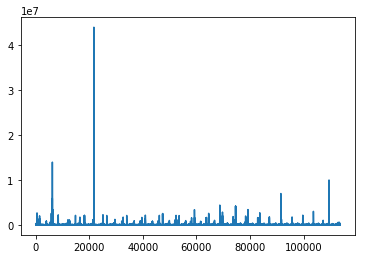

In [28]:
df.NewFiyat.plot()

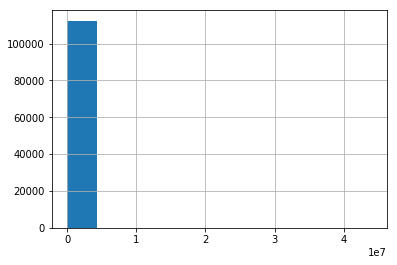

In [29]:
df.NewFiyat.hist()

There are clearly outliers and the distribution is skewed.

In [30]:
df.NewFiyat = np.log1p(df.NewFiyat)

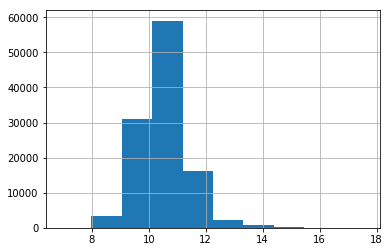

In [31]:
df.NewFiyat.hist()

Skewness corrected!

For outliers I will train an IsolationForest.

In [38]:
from sklearn.ensemble import IsolationForest as IFor
from sklearn.model_selection import train_test_split as tts

clf = IFor(n_jobs=-1, n_estimators=1000)

tr_x, ts_x, tr_y, ts_y = tts(df.drop('NewFiyat',1),df.NewFiyat, test_size=0.2)

clf.fit(tr_y.values.reshape(-1,1))

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=1000, n_jobs=-1,
        random_state=None, verbose=0)

In [39]:
pred = clf.predict(df.NewFiyat.values.reshape(-1,1))

In [40]:
inlier_ind = (pred==1)
outlier_ind = (inlier_ind==False)
x_bool = inlier_ind.reshape(-1,1)

In [47]:
inlier_df = df.loc[inlier_ind,:]

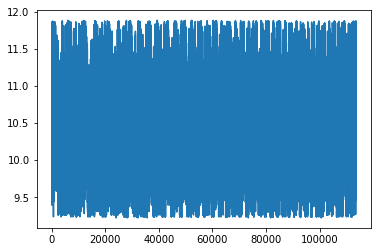

In [48]:
inlier_df.NewFiyat.plot()

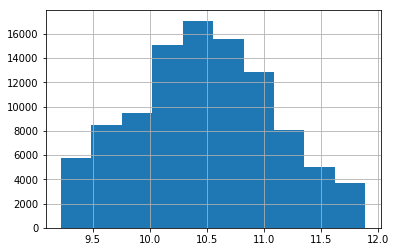

In [49]:
inlier_df.NewFiyat.hist()

In [50]:
x = inlier_df.drop('NewFiyat',1)
y = inlier_df.NewFiyat

In [55]:
x.isna().sum()

intercept      1167
Cekis_0           0
Cekis_1           0
Cekis_2           0
Cekis_3           0
Durum_0           0
Garanti_0         0
Kasa_Tipi_0       0
Kasa_Tipi_1       0
Kasa_Tipi_2       0
Kasa_Tipi_3       0
Kasa_Tipi_4       0
Kasa_Tipi_5       0
Kasa_Tipi_6       0
Kimden_0          0
Kimden_1          0
Marka_0           0
Marka_1           0
Marka_2           0
Marka_3           0
Marka_4           0
Marka_5           0
Marka_6           0
Marka_7           0
Marka_8           0
Marka_9           0
Marka_10          0
Marka_11          0
Marka_12          0
Marka_13          0
               ... 
Seri_435          0
Seri_436          0
Seri_437          0
Seri_438          0
Seri_439          0
Seri_440          0
Seri_441          0
Seri_442          0
Seri_443          0
Seri_444          0
Seri_445          0
Seri_446          0
Seri_447          0
Seri_448          0
Seri_449          0
Seri_450          0
Seri_451          0
Seri_452          0
Seri_453          0


In [56]:
x.drop('intercept',1,inplace=True)

In [58]:
from sklearn.preprocessing import StandardScaler as SS
ss_x = SS()
ss_y = SS()

xsc = ss_x.fit_transform(x)
ysc = ss_y.fit_transform(y.values.reshape(-1,1))

In [61]:
trainx, testx, trainy, testy = tts(xsc,ysc,test_size=0.25)

## 2-Modeling

For modeling I have choosen xgboost due to its popularity in Kaggle and its run speed without compromising accuracy.

In [62]:
import xgboost as xgb

In [63]:
train_set = xgb.DMatrix(trainx,trainy)
test_set = xgb.DMatrix(testx,testy)
evallist  = [(test_set,'eval'), (train_set,'train')]

For hyperparameter purposes I have made a small genetic algorithm based hyperparameter tuner.

In [74]:
import random
import timeit
import gc

randint = random.randint

class ParamSearch():
    def __init__(self,
                 popSize=25,
                 k_folds=5,
                 eliteSize=0.1,
                 paramList=None,
                 model="xgb"):
        #create initial population...
        self.popSize=popSize
        self.k_folds=k_folds
        self.eliteSize=0.1
        self.model=model
        self.min_fitness=None
        self.early_stop_search=5

        if self.model=="xgb":
            self.paramList = ['depth',
                              'nRound',
                              'eta',
                              'gamma',
                              'min_child_weight',
                              'lamda',
                              'alpha',
                              'colsample_bytree',
                              'subsample',
                              'fitness']

            self.population=pd.DataFrame(np.zeros(shape=(popSize,len(self.paramList))),columns = self.paramList)

            self.population.depth=[randint(5,15) for p in range(0,popSize)]
            self.population.nRound=[randint(100,500) for p in range(0,popSize)] # n_boosting_rounds
            self.population.eta=[random.uniform(0.6, 1) for p in range(0,popSize)] # learning_rate
            self.population.gamma=[random.uniform(0.01, 0.03) for p in range(0,popSize)]
            self.population.min_child_weight=[randint(10,100) for p in range(0,popSize)]
            self.population.lamda =[random.uniform(0.1,1) for p in range(0,popSize)]
            self.population.alpha =[random.uniform(0.1, 1) for p in range(0,popSize)]
            self.population.colsample_bytree=[random.uniform(0.7, 1) for p in range(0,popSize)]
            self.population.subsample=[random.uniform(0.7, 1) for p in range(0,popSize)]
            self.population.fitness=[random.uniform(100, 100) for p in range(0,popSize)] # score


    def rmspe(self,y, yhat):
        return np.sqrt(np.mean((yhat/y-1) ** 2))


    def rmspe_xg(self,yhat, y):
        y = y.get_label()
        yhat = yhat
        return "rmspe", self.rmspe(self,y,yhat)


    def RMSPE_objective(self,predts, dtrain):
        labels = dtrain.get_label()
        grad =  -1/labels+predts/(labels**2)
        grad[labels==0]=0
        hess = 1/(labels**2)
        hess[labels==0]=0
        return grad, hess


    def createNewPopulation(self,population,eliteSize=0.1,mutation_rate=0.2):
        population.sort_values(by='fitness',ascending=1,inplace=True)
        population.reset_index(drop=True,inplace=True)
        popSize=population.shape[0]
        nElite=int(round(eliteSize*popSize))

        new_population=population.copy(deep=True);
        # Form a new population from the top 50% instances
        for i in range(nElite,popSize):
            # Get two random parents
            p1=randint(nElite,int(popSize/2))
            p2=randint(nElite,int(popSize/2))

            for attr in list(new_population.columns.values):
                if(random.uniform(0,1)>0.5 ):
                    new_population.ix[i,attr]=population.ix[p1,attr]
                else:
                    new_population.ix[i,attr]=population.ix[p2,attr]

                # Generating some mutations
                #
                # A list of if/else if is horrible, but Python doesn't like switchs
                # https://docs.python.org/3/tutorial/controlflow.html#if-statements
                if(random.uniform(0,1)<mutation_rate ):
                    attr=list(new_population.columns.values)[randint(0,8)]
                    if(attr=='depth'):
                        new_population.ix[i,attr]= max(3,new_population.ix[i,attr]+randint(-2,2))
                    elif(attr=='nRound'):
                        new_population.ix[i,attr]= max(10,new_population.ix[i,attr]+randint(-50,50))
                    elif(attr=='eta'):
                        new_population.ix[i,attr]= max(0.1,new_population.ix[i,attr]+random.uniform(-0.05,0.05))
                    elif(attr=='gamma'):
                        new_population.ix[i,attr]= max(0.1,new_population.ix[i,attr]+random.uniform(-0.005,0.005))
                    elif(attr=='min_child_weight'):
                        new_population.ix[i,attr]= max(0,new_population.ix[i,attr]+randint(-2,2)  )
                    elif(attr=='lamda'):
                        new_population.ix[i,attr]= max(0.1,new_population.ix[i,attr]+random.uniform(-0.05,0.05))
                    elif(attr=='alpha'):
                        new_population.ix[i,attr]= max(0.1,new_population.ix[i,attr]+random.uniform(-0.05,0.05))
                    elif(attr=='colsample_bytree'):
                        new_population.ix[i,attr]= min(1,max(0.6,new_population.ix[i,attr]+random.uniform(-0.05,0.05)))
                    elif(attr=='subsample'):
                        new_population.ix[i,attr]= min(1,max(0.6,new_population.ix[i,attr]+random.uniform(-0.05,0.05)))
        return new_population


    def testInstance(self,population,i,x,y):
        params = {"objective": "reg:linear",
                  "eval_metric":"rmse",
                  "tree_method":"hist",
                  "eta": population.eta[i],
                  "max_depth": population.depth[i],
                  "subsample": population.subsample[i],
                  "colsample_bytree": population.colsample_bytree[i],
                  "num_boost_round":int(population.nRound[i]),
                  "lambda":population.lamda[i],
                  "alpha":population.alpha[i],
                  "gamma":population.gamma[i],
                  "min_child_weight":population.min_child_weight[i],
                  "silent": 1
                  }

        dtrain = xgb.DMatrix(x, label=y)
        history = xgb.cv(
            params,
            dtrain,
            early_stopping_rounds=30,
            num_boost_round =int(population.nRound[i]),
            nfold=self.k_folds, # Number of CV folds
            #feval=self.rmspe_xg, # Custom evaluation metric
            obj=self.RMSPE_objective,
            maximize=False # the lower the evaluation score the better (default aleady False)
            )
        return history["test-rmse-mean"].iloc[-1]

    def search(self,nGeneration,x,y):
        early_break_counter = 0
        for run in range(nGeneration):
            population = self.createNewPopulation(self.population,eliteSize=0.1,mutation_rate=0.2)
            for i in range(self.popSize):

                if early_break_counter >= self.early_stop_search:
                    early_break_counter=0
                    print("early stopping in %i-th generation's %i-th population."%(run,i-1))
                    break

                start_time = timeit.default_timer()
                print ("Testing instance %d "%i)
                population.ix[i,'fitness']=self.testInstance(population,i,x,y)
                print ("> Fitness %f \n " % population.fitness[i])
                print ("Time elapsed: ", timeit.default_timer()-start_time)
                print ("-------------------------------------------------")
                if i == 0:
                    self.min_fitness = population.ix[i,'fitness']
                else:
                    if population.ix[i,'fitness'] < self.min_fitness:
                        self.min_fitness = population.ix[i,'fitness']
                    else:
                        early_break_counter = early_break_counter + 1

                gc.collect()
            population.sort_values(by='fitness',ascending=1,inplace=True)
            population.reset_index(drop=True,inplace=True)
            print("Generation %d Best fitness (%d-fold RMSPE CV): %f" %(run, self.k_folds, population.fitness[0]))

        return population.iloc[0]

In [75]:
ga = ParamSearch(k_folds=3)
bestparams = ga.search(5,xsc,ysc)

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:103: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:93: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/s

Testing instance 0 


/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:155: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:160: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


> Fitness 0.289680 
 
Time elapsed:  76.14491216099987
-------------------------------------------------
Testing instance 1 
> Fitness 0.296330 
 
Time elapsed:  46.831979778000004
-------------------------------------------------
Testing instance 2 


/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:162: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


> Fitness 0.301866 
 
Time elapsed:  73.44532262499979
-------------------------------------------------
Testing instance 3 
> Fitness 0.304342 
 
Time elapsed:  49.00008737799999
-------------------------------------------------
Testing instance 4 
> Fitness 0.283694 
 
Time elapsed:  47.94611832999999
-------------------------------------------------
Testing instance 5 


/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:163: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


> Fitness 0.302279 
 
Time elapsed:  116.08729592399959
-------------------------------------------------
Testing instance 6 
> Fitness 0.305438 
 
Time elapsed:  63.18314938799995
-------------------------------------------------
early stopping in 0-th generation's 6-th population.
Generation 0 Best fitness (3-fold RMSPE CV): 0.283694
Testing instance 0 
> Fitness 0.289680 
 
Time elapsed:  69.1796880689999
-------------------------------------------------
Testing instance 1 
> Fitness 0.326891 
 
Time elapsed:  55.70328708199986
-------------------------------------------------
Testing instance 2 
> Fitness 0.336252 
 
Time elapsed:  108.08796873200026
-------------------------------------------------
Testing instance 3 
> Fitness 0.302039 
 
Time elapsed:  52.06108811800004
-------------------------------------------------
Testing instance 4 
> Fitness 0.306401 
 
Time elapsed:  46.080419742999766
-------------------------------------------------
Testing instance 5 
> Fitness 0.2578

In [76]:
bestparams

depth                12.000000
nRound              167.000000
eta                   0.593767
gamma                 0.029997
min_child_weight     80.000000
lamda                 0.213813
alpha                 0.127132
colsample_bytree      0.700235
subsample             0.929850
fitness               0.270145
Name: 0, dtype: float64

In [81]:
params = {"objective": "reg:linear",
              "eval_metric":"rmse",
              "tree_method":"exact",
              "eta": 0.593767,
              "max_depth": 12,
              "subsample": 0.929850,
              "colsample_bytree": 0.700235,
              "num_boost_round":167.000000,
              "lambda":0.213813,
              "alpha":0.127132,
              "gamma":0.029997,
              "min_child_weight":80
              }

In [82]:
mdl = xgb.train(params, train_set)

In [83]:
y_pred = mdl.predict(test_set)

In [84]:
y_test_unscaled = ss_y.inverse_transform(testy)
y_pred_unscaled = ss_y.inverse_transform(y_pred)

In [85]:
y_test_unscaled = np.expm1(y_test_unscaled)
y_pred_unscaled = np.expm1(y_pred_unscaled)

In [86]:
from sklearn.metrics import mean_squared_error as m_s_e

In [87]:
print("MSE for unscaled prediction: %.2f" %(np.sqrt(m_s_e(y_test_unscaled,y_pred_unscaled))))

MSE for unscaled prediction: 6761.30


6000 TL error isnt good but its promising and is a good start!